In [19]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [20]:
df = pd.read_csv('./Premier_League.csv')
df.head()

,date,clock,stadium,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,...,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,28th May 2023,4:30pm,Emirates Stadium,"60,095",Arsenal,5,Wolverhampton Wanderers,0,51.0,49.0,...,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,28th May 2023,4:30pm,Villa Park,"42,212",Aston Villa,2,Brighton and Hove Albion,1,40.3,59.7,...,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,28th May 2023,4:30pm,Gtech Community Stadium,"17,120",Brentford,1,Manchester City,0,34.4,65.6,...,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,28th May 2023,4:30pm,Stamford Bridge,"40,130",Chelsea,1,Newcastle United,1,64.4,35.6,...,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,28th May 2023,4:30pm,Selhurst Park,"25,198",Crystal Palace,1,Nottingham Forest,1,66.0,34.0,...,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...


In [21]:
df.columns

Index(['date', 'clock', 'stadium', 'attendance', 'Home Team', 'Goals Home',
       'Away Team', 'Away Goals', 'home_possessions', 'away_possessions',
       'home_shots', 'away_shots', 'home_on', 'away_on', 'home_off',
       'away_off', 'home_blocked', 'away_blocked', 'home_pass', 'away_pass',
       'home_chances', 'away_chances', 'home_corners', 'away_corners',
       'home_offside', 'away_offside', 'home_tackles', 'away_tackles',
       'home_duels', 'away_duels', 'home_saves', 'away_saves', 'home_fouls',
       'away_fouls', 'home_yellow', 'away_yellow', 'home_red', 'away_red',
       'links'],
      dtype='object')

In [22]:
df["home_victory"] = df.apply(lambda row : True if row['Goals Home'] > row['Away Goals'] else False, axis=1 )
df["pass_percentage"] = df.apply(lambda row : row["home_pass"]/ (row["home_pass"]+row["away_pass"]), axis=1 )
df["chances_percentage"] = df.apply(lambda row : 0 if (row["home_chances"]+row["away_chances"]) == 0 else row["home_chances"]/ (row["home_chances"]+row["away_chances"]), axis=1 )

In [23]:
unused_columns = ["Goals Home", "Away Goals", "attendance", "date", "clock", "stadium", "Home Team", "Away Team", "links"]

df = df.drop(unused_columns, axis=1)

df.head()

,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,home_off,away_off,home_blocked,away_blocked,...,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,home_victory,pass_percentage,chances_percentage
0,51.0,49.0,14,6,8,0,4,4,2,2,...,3,8,11,0,0,0,0,True,0.502825,1.000000
1,40.3,59.7,12,8,5,4,5,3,2,1,...,3,15,16,4,4,0,0,True,0.473883,0.571429
2,34.4,65.6,11,17,4,3,4,6,3,8,...,3,12,8,4,0,0,0,True,0.468953,0.666667
3,64.4,35.6,22,13,5,4,9,5,8,4,...,5,9,11,0,0,0,0,False,0.516260,0.500000
4,66.0,34.0,15,7,3,4,8,2,4,1,...,2,9,13,0,2,0,0,False,0.550771,1.000000


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['home_victory'])
Y = df['home_victory']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_set = {}
for i in (4,5,6):
   for j in (20, 25, 30, 35, 40):
    dt_set[(i,j)] = {"dt" : DecisionTreeClassifier(criterion = 'entropy',max_depth = i,min_samples_leaf = j)}
    dt_set[(i,j)]["dt"].fit(X_train, Y_train)
    dt_set[(i,j)]["accuracy"] = accuracy_score(Y_test,dt_set[(i,j)]["dt"].predict(X_test))

for k in dt_set.keys():
  print(k, dt_set[k]["accuracy"])


(4, 20) 0.7052631578947368
(4, 25) 0.6736842105263158
(4, 30) 0.6421052631578947
(4, 35) 0.6105263157894737
(4, 40) 0.6526315789473685
(5, 20) 0.6631578947368421
(5, 25) 0.6736842105263158
(5, 30) 0.6421052631578947
(5, 35) 0.6105263157894737
(5, 40) 0.6526315789473685
(6, 20) 0.6631578947368421
(6, 25) 0.6736842105263158
(6, 30) 0.6421052631578947
(6, 35) 0.6105263157894737
(6, 40) 0.6526315789473685


In [30]:
# Vamos agora selecionar os resultados com maior acurácia

# Selecionado a maior acurácia
dt_max = max(
    [x["accuracy"] for x in dt_set.values()]
  )

# Envontrando os paresq eu tiveram essa acurácia
bests_dts = [x["dt"] for x in dt_set.values() if x["accuracy"] == dt_max]

# Separando por max_depth
bests_dts_dict = {}
for dt in bests_dts:
  if dt.max_depth in bests_dts_dict.keys():
    # Vou só alternar para ter mais variância no número de samples (e diretamenta ma maior profundidade)
    if (dt.max_depth%2)^(dt.min_samples_leaf > bests_dts_dict[dt.max_depth].min_samples_leaf):
      continue
  bests_dts_dict[dt.max_depth] = dt

bests_dts = list(bests_dts_dict.values())

len(bests_dts)

1

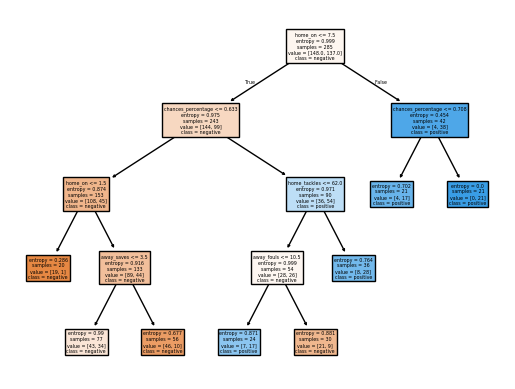

In [31]:
from sklearn import tree

tree.plot_tree(bests_dts[0], feature_names = X.columns, class_names=['negative', "positive"],filled = True);
